# University of Idaho - Climate Impacts Research Consortium (CIRC)
## Data Mining Stream: Agricultural Resilience Data Modeling
## Commodity Model: WHEAT
### Erich Seamon, UPDATED: July 24, 2016
### erichs@uidaho.edu
### http://dmine.io
### http://erich.io

<H2>DMINE Ag Resilience - Part 4: Data Modeling - Commodity Model: WHEAT </H2>

**The Climate Impacts Research Consortium (CIRC)** data mining stream has developed a set of data mining and machine learning processes, in order to provide a basic example of how we might approach climatic impact prediction over space and time.

Our example in this instance is to explore how we might predict economic crop loss over space and time, using data that is extracted from differing sources, transformed, and combined with a response variable that is a approximation of economic crop loss, in dollars. This notebook provides an overview of our steps for this example, which include:


**1. Demo Overview. ** An overview of the problem, summary of the datasets involved.
   <br> </br> <br></br>
**2. Data transformation.**  What steps do we need to take to transform and combine data into a form that is ready to machine learning techniques?
    <br></br><br></br>
**3. Exploratory Data Analysis.**  After transforming the data, a matrix of all values is generated.  From this dataset, what EDA can we perform that will help us to better understand our hypothesis/es?
    <br></br><br></br>
**4. Machine learning model generation, optimization.**  Which model works best?
   <br></br><br></br>
**5. Model Instantiation. ** Apply most optimized model to a python API for enabling prediction requests.


## 1. Demo Overview: Overview of the problem, and summary of datasets

### Food Resilience NOAA key points (adapted from Third National Climate Assessment - Hatfield, et al, 2014)


 - Climate disruptions to agricultural production have increased over the past 40 years and are projected to increase over the next 25 years. Farmers and ranchers will likely need to increase their rate of innovation and adaptation to keep pace with this projected change.
 
 - Crop and livestock production in many agricultural regions will likely decline due to weeds, diseases, insects, and climate-related stresses.
 
 - The rising incidence of extreme weather—including heat waves, drought, and very heavy precipitation—will increasingly impact crop and livestock productivity.
 
 - Climate-related changes in crop yields and food prices as well as impacts on food processing, storage, and distribution systems can impact food security.
 
 
 ### Problem question: Can we perform data mining techniques to assemble food resilience data - and construct a machine learning model that predicts economic crop loss?
 
 

## Datasets and data sources used as part of the analysis

To be straightforward for the sake of demonstration - we are using two core datasets:
    
- **University of Idaho GRIDMET data.**  Since our CIRC project uses UIdaho GRIDMET/MACA data for a portion of our research efforts, i thought using this as an input dataset might be appropriate.  As a note, we can easily add variables to this grouping that might be from other sources.
- **USDA Economic Crop Loss data.**  The USDA's Risk Management Agency summarizes economic crop loss insurance claims at a county and monthly level, going back to 1980.  This dataset gives a historical view of crop loss, and to a more generalized degree, overall economic food security.  

Transforming both datasets to be spatially and geographically normalized (at the county/monthly/commodity level), we can then integrate into one big matrix.

## 2. Data Transformation

Data transformation was done in R.  The following R script was used to 

In [453]:
import PIL
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import os,sys
import numpy as np
from PIL import Image
from urllib2 import urlopen
import os,sys
from PIL import Image


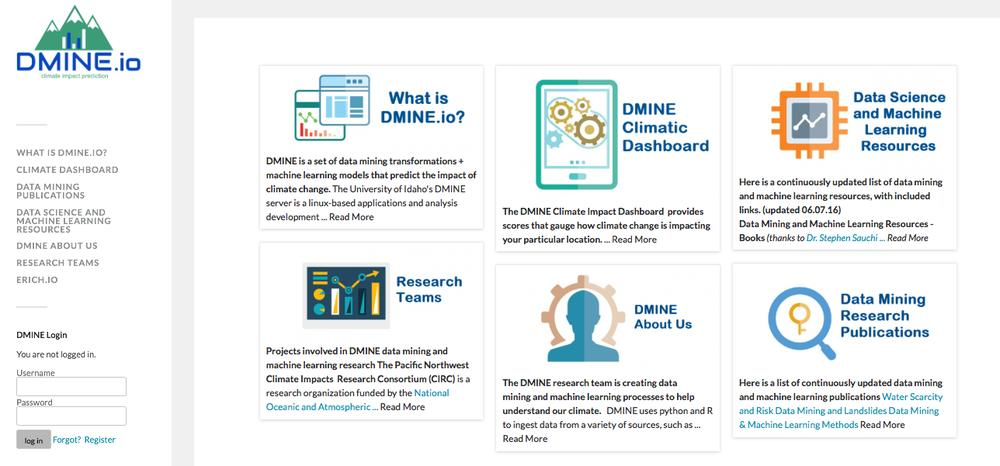

In [454]:
basewidth = 1000
img = Image.open(urlopen("http://dmine.io/wp-content/uploads/2016/06/Screen-Shot-2016-06-10-at-7.35.10-PM.png"))
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
os.chdir("/nethome/erichs/")
img.save("dmine-website-2016.jpg")
jpgfile = Image.open("dmine-website-2016.jpg")
jpgfile

# Machine Learning Demonstration - CIRC DMINE AG



## Loading libraries and importing data.  

This dataset is a ~14000 record dataset of monthly crop loss and acreage values, that has been integrated with GRIDMET daily data - summarized to monthly, and at a county geographic scale - for only Washington.

In [455]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
os.chdir("/agmesh-scenarios/scenario_52177/commodity_county/")
train = pd.read_csv('Whitman_WHEAT.csv')
%matplotlib nbagg

In [456]:
train

Unnamed: 0  year month  countyfips         bi        pr          th  \
0            81  2001   APR       53075  13.452469  1.849202   207.25350   
1           127  2001   AUG       53075  45.339425  0.087378   213.82750   
2           129  2001   AUG       53075  45.339425  0.087378   213.82750   
3           130  2001   AUG       53075  45.339425  0.087378   213.82750   
4           150  2001   DEC       53075   4.206029  2.083701   173.91330   
5           240  2001   JUL       53075  35.071096  0.357934   235.64050   
6           243  2001   JUL       53075  35.071096  0.357934   235.64050   
7           245  2001   JUL       53075  35.071096  0.357934   235.64050   
8           383  2001   JUN       53075  24.798008  1.036644   204.90070   
9           384  2001   JUN       53075  24.798008  1.036644   204.90070   
10          387  2001   JUN       53075  24.798008  1.036644   204.90070   
11          389  2001   JUN       53075  24.798008  1.036644   204.90070   
12          393  2001   JUN       53075  24.798008  1.036644   204.90070   
13          394  2001   JUN       53075  24.798008  1.036644   204.90070   
14          396  2001   JUN       53075  24.798008  1.036644   204.90070   
15          397  2001   JUN       53075  24.798008  1.036644   204.90070   
16          398  2001   JUN       53075  24.798008  1.036644   204.90070   
17          452  2001   MAR       53075  12.500366  1.187730   198.91500   
18          453  2001   MAR       53075  12.500366  1.187730   198.91500   
19          588  2001   MAY       53075  26.716829  0.860016   212.72000   
20          589  2001   MAY       53075  26.716829  0.860016   212.72000   
21          590  2001   MAY       53075  26.716829  0.860016   212.72000   
22          595  2001   MAY       53075  26.716829  0.860016   212.72000   
23          596  2001   MAY       53075  26.716829  0.860016   212.72000   
24          600  2001   MAY       53075  26.716829  0.860016   212.72000   
25          602  2001   MAY       53075  26.716829  0.860016   212.72000   
26          604  2001   MAY       53075  26.716829  0.860016   212.72000   
27          605  2001   MAY       53075  26.716829  0.860016   212.72000   
28          744  2001   SEP       53075  41.814355  0.215051   204.73700   
29          746  2001   SEP       53075  41.814355  0.215051   204.73700   
30          861  2002   APR       53075  20.918077  0.765545   213.14390   
31          862  2002   APR       53075  20.918077  0.765545   213.14390   
32          863  2002   APR       53075  20.918077  0.765545   213.14390   
33          937  2002   AUG       53075  44.653520  0.398962   235.21500   
34          938  2002   AUG       53075  44.653520  0.398962   235.21500   
35          940  2002   AUG       53075  44.653520  0.398962   235.21500   
36          941  2002   AUG       53075  44.653520  0.398962   235.21500   
37          942  2002   AUG       53075  44.653520  0.398962   235.21500   
38          944  2002   AUG       53075  44.653520  0.398962   235.21500   
39          962  2002   DEC       53075   5.905807  2.226300   156.29910   
40         1078  2002   JUL       53075  40.800250  0.168209   202.59900   
41         1079  2002   JUL       53075  40.800250  0.168209   202.59900   
42         1081  2002   JUL       53075  40.800250  0.168209   202.59900   
43         1085  2002   JUL       53075  40.800250  0.168209   202.59900   
44         1086  2002   JUL       53075  40.800250  0.168209   202.59900   
45         1223  2002   JUN       53075  27.972896  1.066683   211.10180   
46         1224  2002   JUN       53075  27.972896  1.066683   211.10180   
47         1225  2002   JUN       53075  27.972896  1.066683   211.10180   
48         1227  2002   JUN       53075  27.972896  1.066683   211.10180   
49         1234  2002   JUN       53075  27.972896  1.066683   211.10180   
50         1235  2002   JUN       53075  27.972896  1.066683   211.10180   
51         1236  2002   JUN       53075  27.972896  1

In [457]:
# create column vectors
# all columns
all_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'acres', 'countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode', 'loss']

# only feature columns
feature_cols1 = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode', 'acres', 'loss']

feature_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'acres']

matrix_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'loss']
matrix_withlog_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'loss', 'logloss']

matrix_less_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax']
all_minus_cols = ['countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode']

#--------

# Creating X for machine learning for joining with dummy fields

X = train[feature_cols]
Xpre = stats.zscore(X)
Xpre = pd.DataFrame(X)
X1 = train[all_minus_cols]
X1 = pd.DataFrame(X1)
X = pd.concat([Xpre, X1], axis=1)

# create dummy code columns

monthcode_dummies = pd.get_dummies(X['monthcode'])
damagecause_dummies = pd.get_dummies(X['damagecausecode'])
insuranceplancode_dummies = pd.get_dummies(X['insuranceplancode'])
#commodity_dummies = pd.get_dummies(X['commoditycode'])
stagecode_dummies = pd.get_dummies(X['stagecode'])
#countyfips_dummies = pd.get_dummies(X['countyfips'])
#year_dummies = pd.get_dummies(X['year'])


In [458]:
#-generate zscores for all the x climate data variables.  Adds a '_zscore' to the end of the column name

for col in Xpre:
    col_zscore = col + '_zscore'
    Xpre[col_zscore] = (Xpre[col] - Xpre[col].mean())/Xpre[col].std(ddof=0)


In [459]:
Xpre_standard = Xpre.ix[:,16:]


## Rename dummy variables

In [460]:
monthcode_dummies = monthcode_dummies.rename(columns={1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec', '11': 'nov'})
damagecause_dummies = damagecause_dummies.rename(columns={'11': 'drought', '12': 'heat', '43': 'cold winter', '21': 'hail', '41': 'frost', '1': 'decline in price', '81': 'plant disease', '42': 'freeze', '31': 'excess moisture/precip/rain', '51': 'flood', '61': 'wind/excess wind', '71': 'insects', '44': 'cold wet weather', '91': 'fire', '13': 'failure irrig supply', '99': 'other(snow-lightning-etc)', '01': 'decline in price', '93': 'wildlife', '63': 'cyclone', '87': 'falling numbers', '14': 'failure irrig equip', 'XX': 'other causes', '62': 'hot wind'})
insuranceplancode_dummies = insuranceplancode_dummies.rename(columns={44: 'CRC', 42: 'IP', 90: 'APH', 1: 'YP', 2: 'RP', 3: 'RPHPE'})


In [461]:
# Put the dummy code data together

dummies = pd.concat([monthcode_dummies, damagecause_dummies, insuranceplancode_dummies, stagecode_dummies], axis=1)

In [462]:
#  merge dummies with X

Xm_standard = pd.concat([Xpre_standard, dummies], axis=1)
#Xm_standard = pd.DataFrame(stats.zscore(Xm))

# ***** Xm_standard becomes the final X response vector for our machine learning model *****

# create response vector (y)

y = train.loss
y = pd.Series.to_frame(y)
#y = stats.zscore(y)
#y = np.ravel(y)

#-log transform crop loss data for boxplot

ylog = np.log(y)
ylog.columns = ['logloss']

# create standardized dataset
standardized = pd.concat([X, y], axis=1)
standardized_withlog = pd.concat([X, y, ylog], axis=1)
#standardized_withlog.columns = matrix_withlog_cols
standardized.columns = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'acres', 'countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode', 'loss']


# actual dataset, not normalized
actual = pd.concat([train[feature_cols], train[all_minus_cols], y],  axis=1)
actual.columns = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'acres', 'countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode', 'loss']
actual_log = pd.concat([actual, ylog],  axis=1)

In [463]:
#-generate zscores for all the x climate data variables.  Adds a '_zscore' to the end of the column name

for col in y:
    col_zscore = col + '_zscore'
    y[col_zscore] = (y[col] - y[col].mean())/y[col].std(ddof=0)

In [464]:
y_standard = y['loss']
y_zscore = y['loss_zscore']
y = y_standard

### Normalize Y

In [465]:
# convert y series to a data frame

y_zscore = pd.Series.to_frame(y_zscore)

### List y columns 

In [466]:
y_zscore.columns.unique()

array(['loss_zscore'], dtype=object)

### List X normalized columns

In [467]:
dummies.columns

Index([u'jan', u'feb', u'mar', u'apr', u'may', u'jun', u'jul', u'aug', u'sep',
       u'oct', u'nov', u'dec', u'decline in price', u'decline in price',
       u'drought', u'heat', u'failure irrig supply', u'failure irrig equip',
       u'hail', u'excess moisture/precip/rain', u'frost', u'freeze',
       u'cold winter', u'cold wet weather', u'flood', u'wind/excess wind',
       u'hot wind', u'cyclone', u'insects', u'plant disease',
       u'falling numbers', u'fire', u'wildlife', u'other(snow-lightning-etc)',
       u'other causes', u'YP', u'RP', u'RPHPE', u'IP', u'CRC', u'APH', u'H',
       u'P', u'P2', u'PT', u'R', u'UH'],
      dtype='object')

# Exploratory Data Analysis

In [327]:
# Put Xm_standard and y_zscore together, for EDA
train_EDA = pd.concat([Xm_standard, y_zscore],  axis=1)

## All Wheat Loss by Year for Washington, 2001-2015

<IPython.core.display.Javascript object>


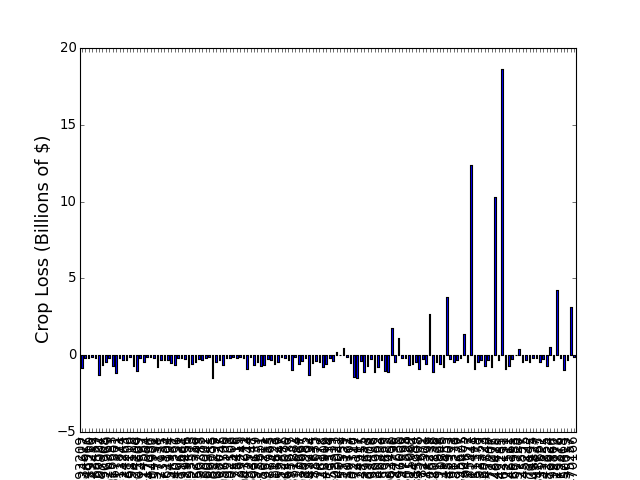

In [328]:
%matplotlib nbagg
train_EDA.groupby(['bi_zscore']).loss_zscore.sum().plot(kind='bar')
plt.ylabel('Crop Loss (Billions of $)', fontsize=16)


## All Loss by Commodity for Washington, 2001-2015

<IPython.core.display.Javascript object>


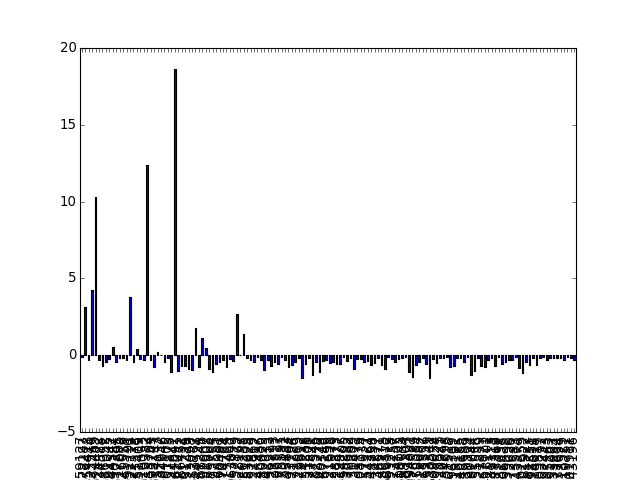

In [329]:
%matplotlib nbagg
train_EDA.groupby(['rmax_zscore']).loss_zscore.sum().plot(kind='bar')

## All Loss by County for Washington, 2001-2015

<IPython.core.display.Javascript object>


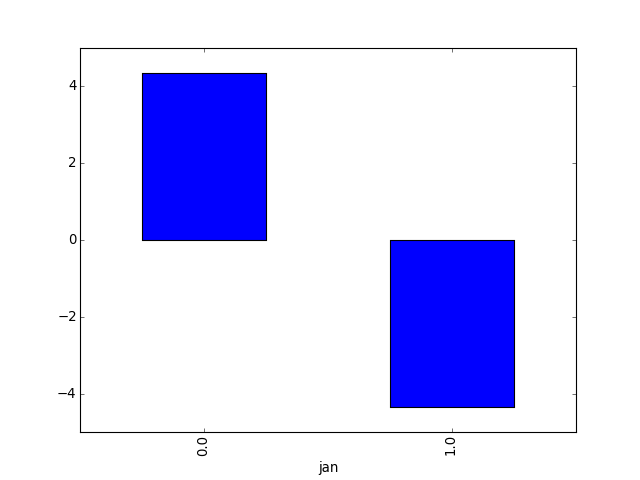

In [330]:
%matplotlib nbagg
train_EDA.groupby(['jan']).loss_zscore.sum().plot(kind='bar')

## Histogram of loss by County, Washington, 2001 - 2015.  Are there many small claims, a few large claims by county?

<IPython.core.display.Javascript object>


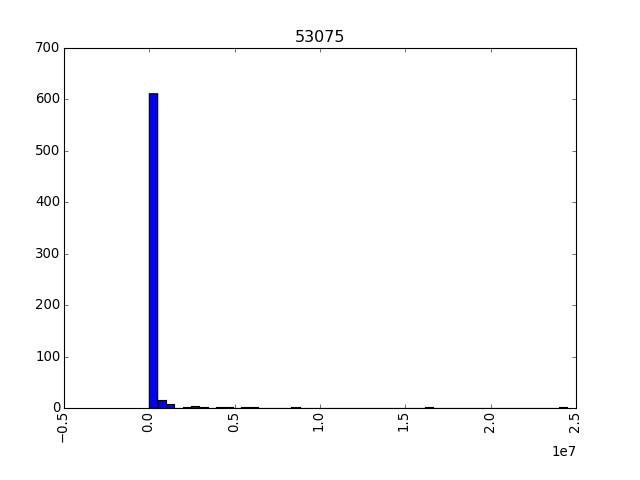

In [331]:
%matplotlib nbagg
actual.hist(column='loss', by='countyfips', grid=False, bins=50)


## Box Plot of Wheat crop loss by month, Washington, 2001 - 2015 - by year - using log tranformed data

<IPython.core.display.Javascript object>


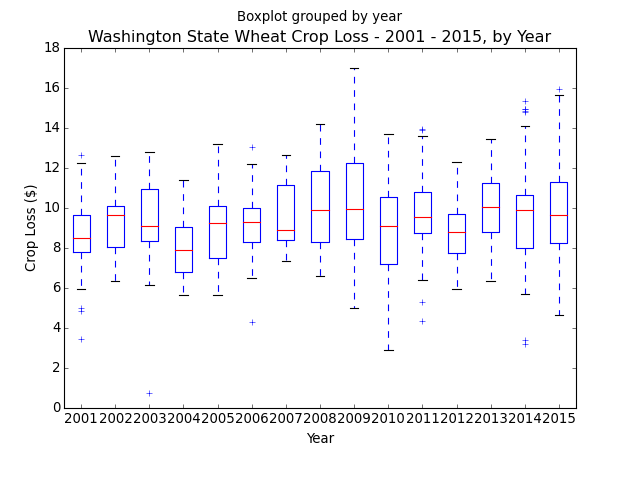

In [332]:
%matplotlib nbagg

from pylab import *
from scipy.io import loadmat

actual_log.boxplot(column='logloss', by='year', grid=False)
# labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
# xticks(range(1,13),labels, rotation=15)
xlabel('Year')
ylabel('Crop Loss ($)')
title('Washington State Wheat Crop Loss - 2001 - 2015, by Year')

## Box Plot of Wheat crop loss by damage cause, Washington, 2001 - 2015 - by year - using log tranformed data

<IPython.core.display.Javascript object>


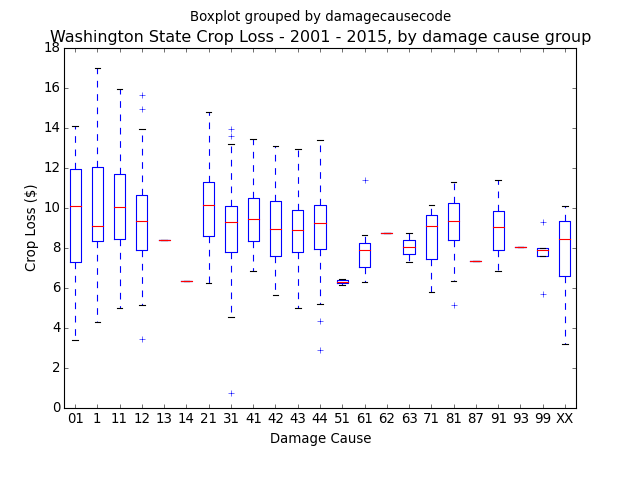

In [333]:
%matplotlib nbagg

from pylab import *
from scipy.io import loadmat

actual_log.boxplot(column='logloss', by='damagecausecode', grid=False)
# labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
# xticks(range(1,13),labels, rotation=15)
xlabel('Damage Cause')
ylabel('Crop Loss ($)')
title('Washington State Crop Loss - 2001 - 2015, by damage cause group')

<IPython.core.display.Javascript object>


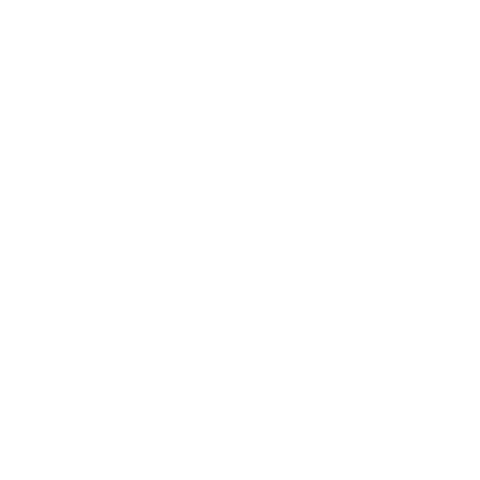

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=53075.0, right=53075.0
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=11.0, right=11.0
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2809: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=53075.0, top=53075.0
  'bottom=%s, top=%s') % (bottom, top))
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2809: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=11.0, top=11.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7bfc54090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff7b15fa310>]], dtype=object)

In [232]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(actual, alpha=0.2, figsize=(6, 6), diagonal='hist')

<IPython.core.display.Javascript object>


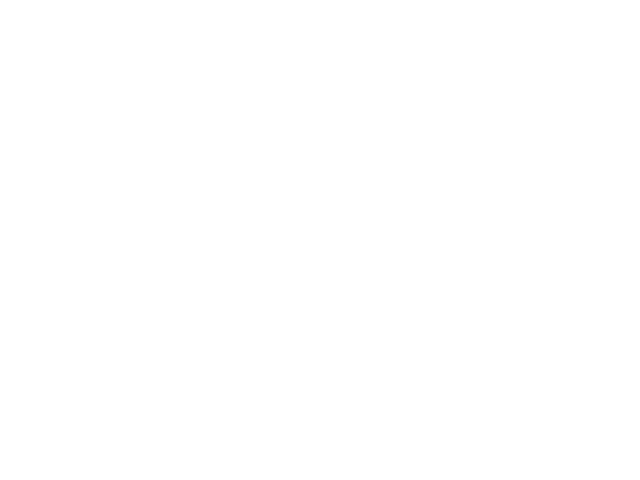

<IPython.core.display.Javascript object>


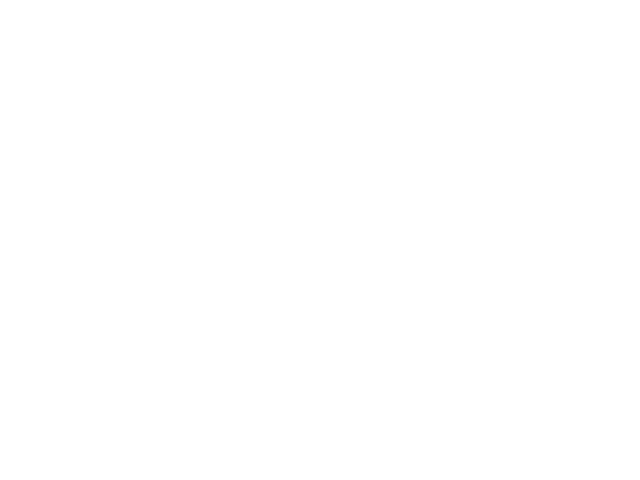

<IPython.core.display.Javascript object>


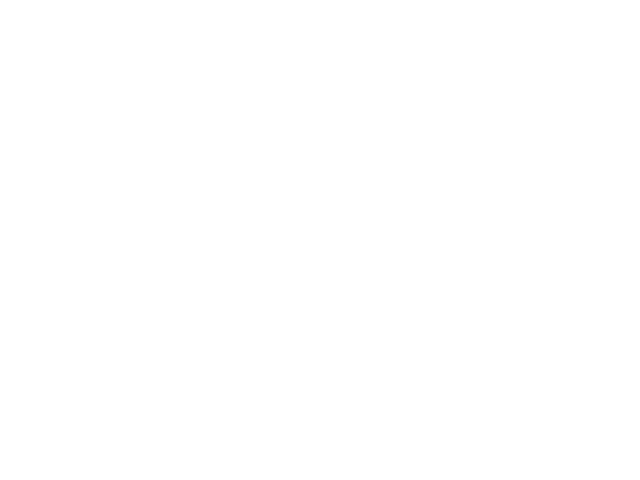

<IPython.core.display.Javascript object>


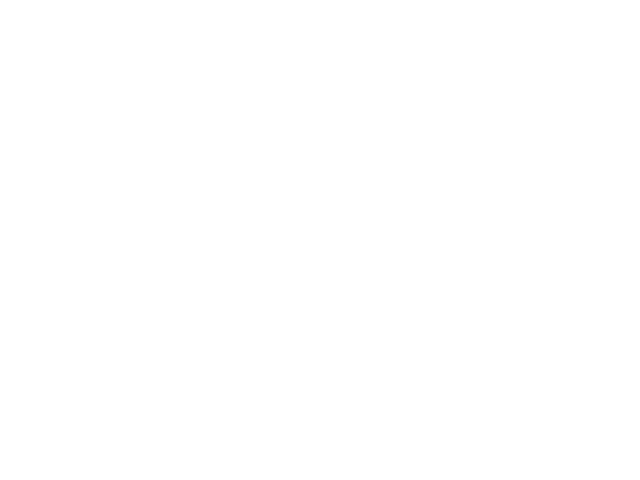

<IPython.core.display.Javascript object>


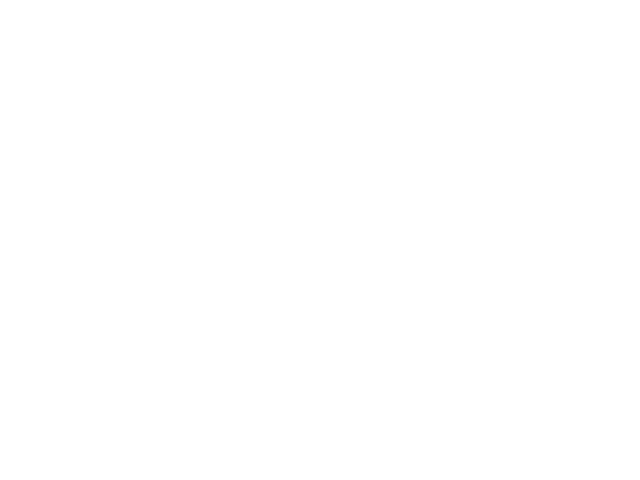

<IPython.core.display.Javascript object>


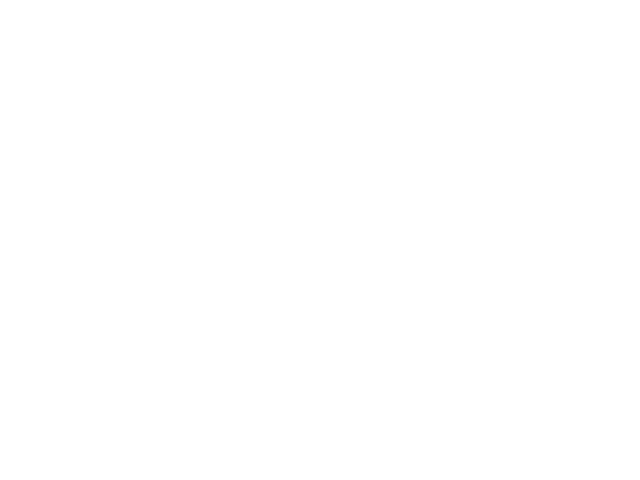

<IPython.core.display.Javascript object>


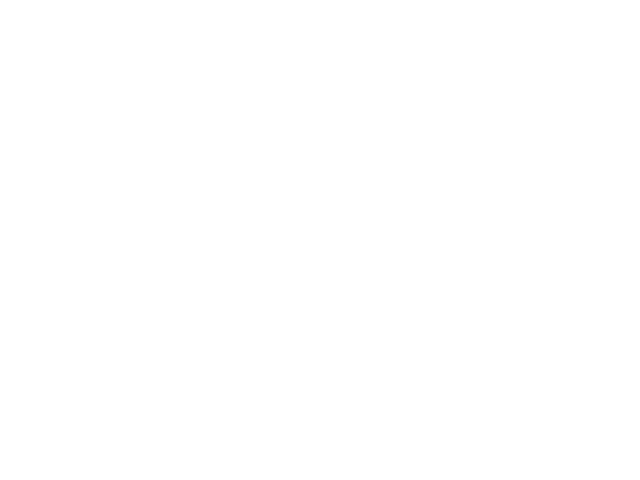

<IPython.core.display.Javascript object>


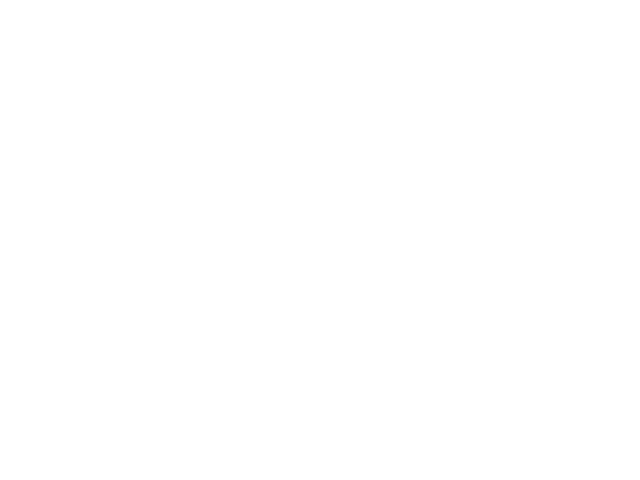

<IPython.core.display.Javascript object>


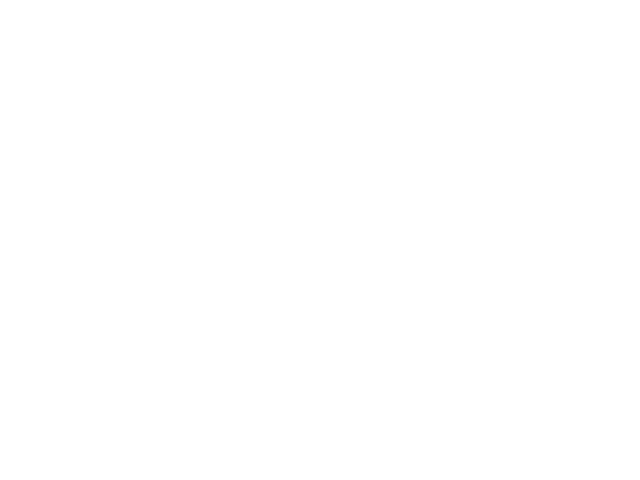

<IPython.core.display.Javascript object>


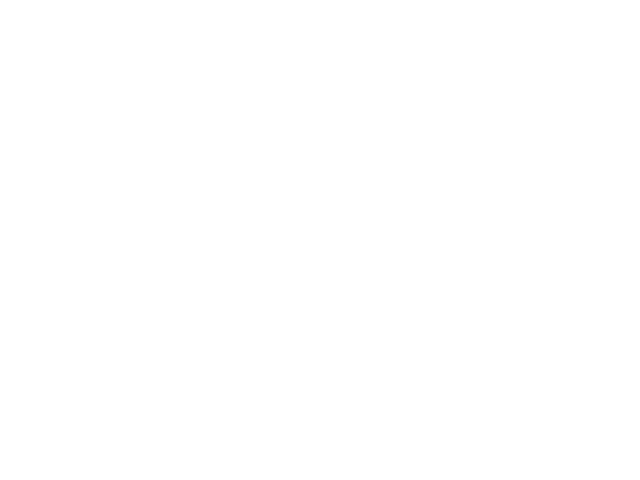

<IPython.core.display.Javascript object>


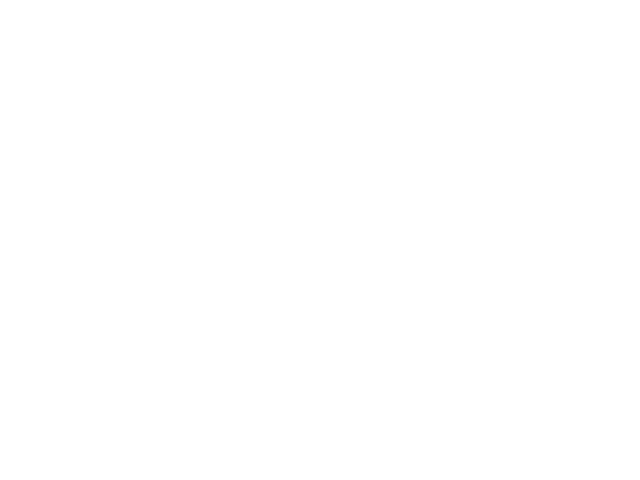

<IPython.core.display.Javascript object>


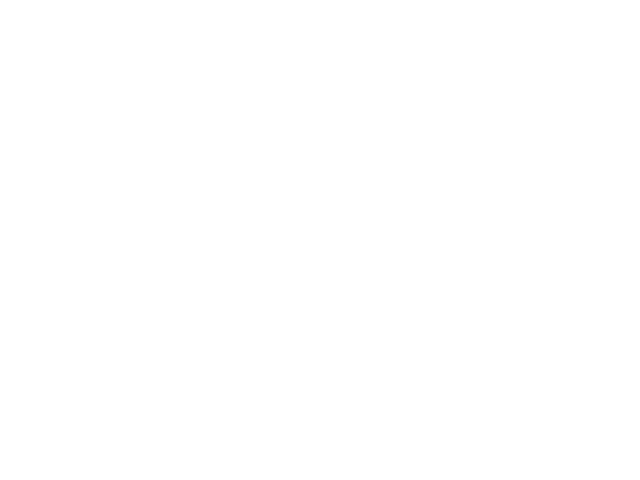

<IPython.core.display.Javascript object>


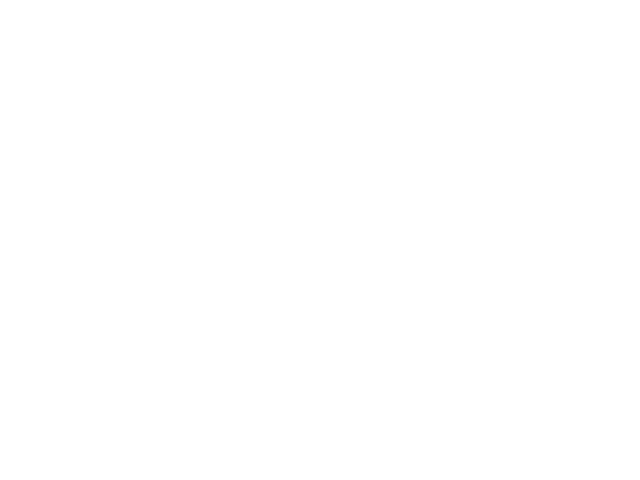

<IPython.core.display.Javascript object>


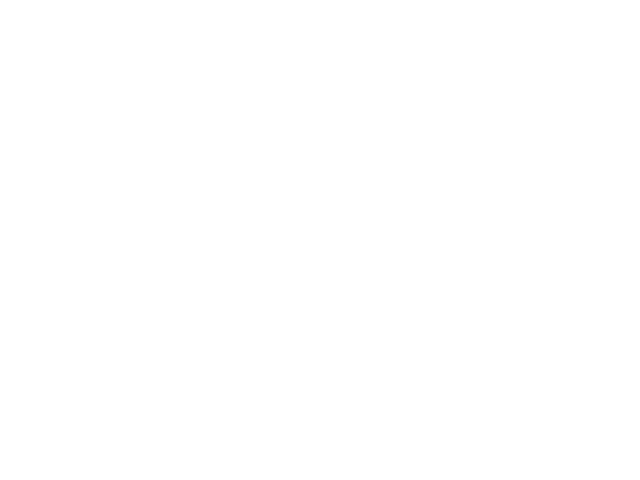

<IPython.core.display.Javascript object>


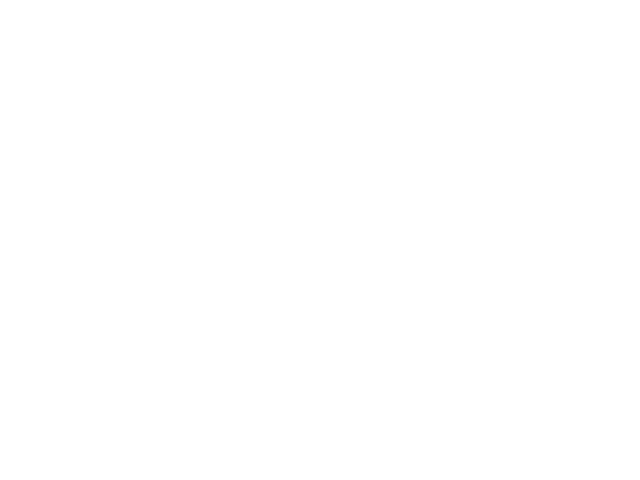

<IPython.core.display.Javascript object>


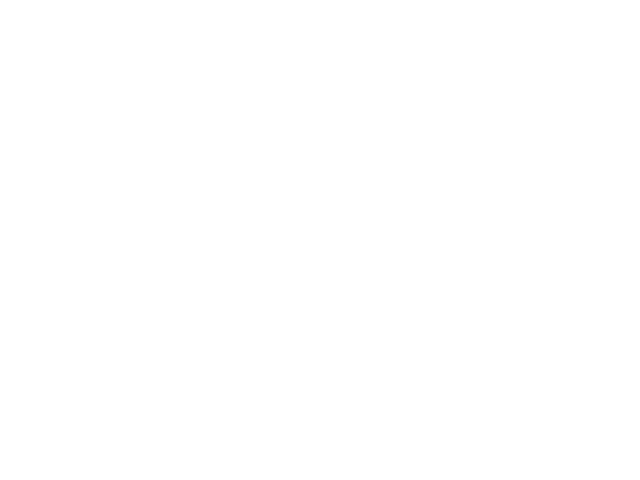

<IPython.core.display.Javascript object>


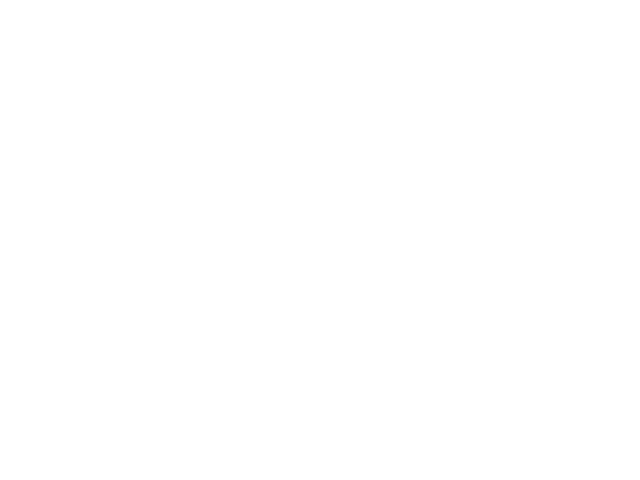

<IPython.core.display.Javascript object>


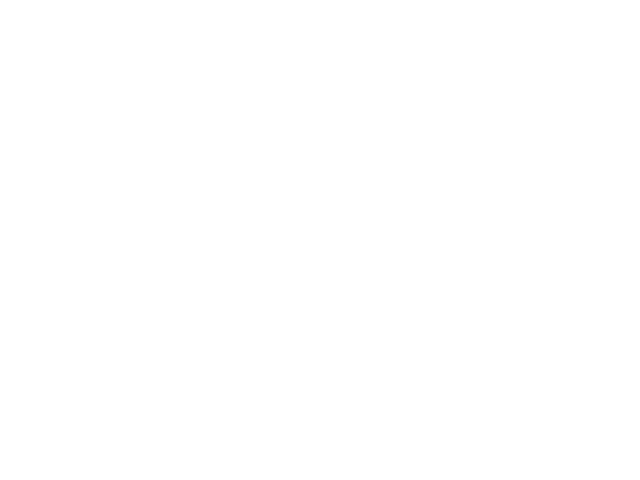

/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


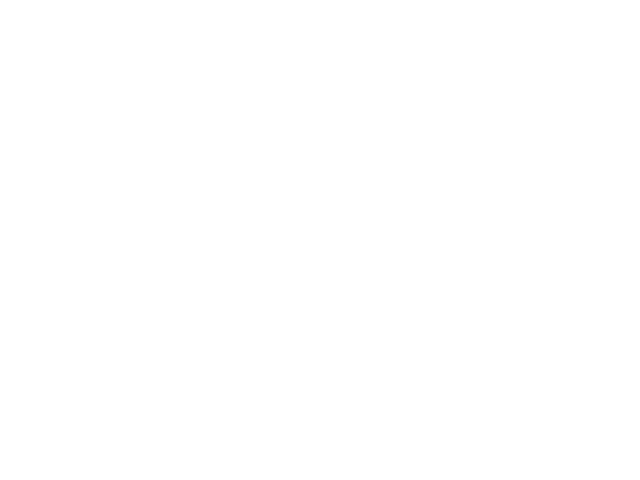

<IPython.core.display.Javascript object>


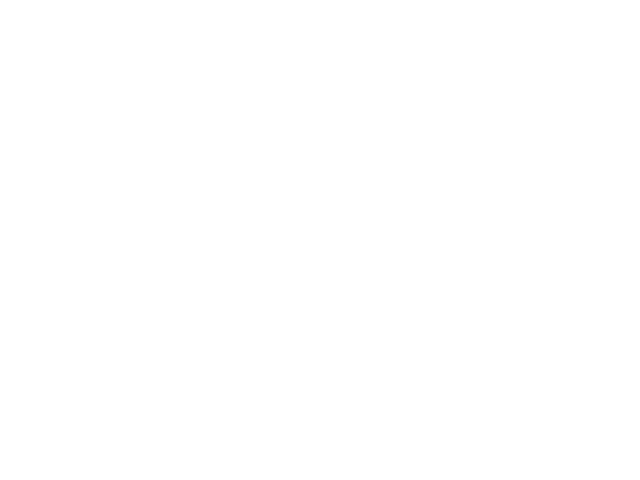

<IPython.core.display.Javascript object>


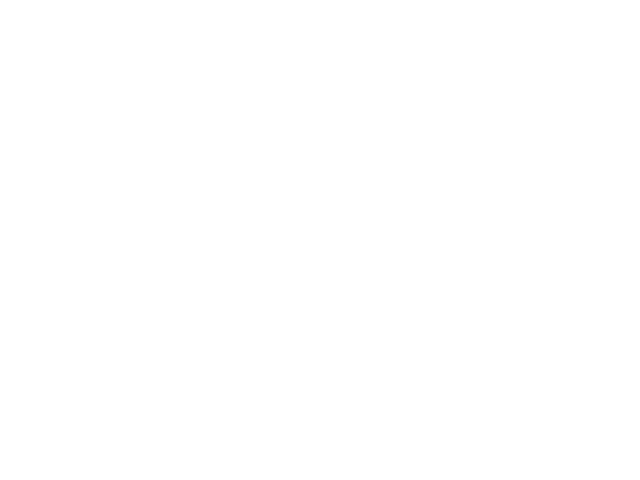

<IPython.core.display.Javascript object>


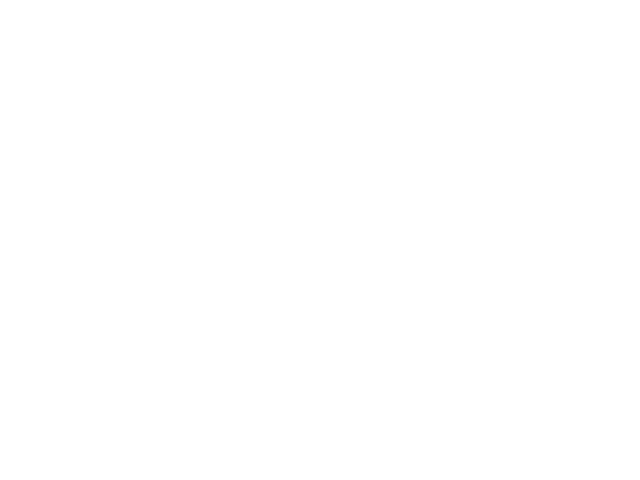

<IPython.core.display.Javascript object>


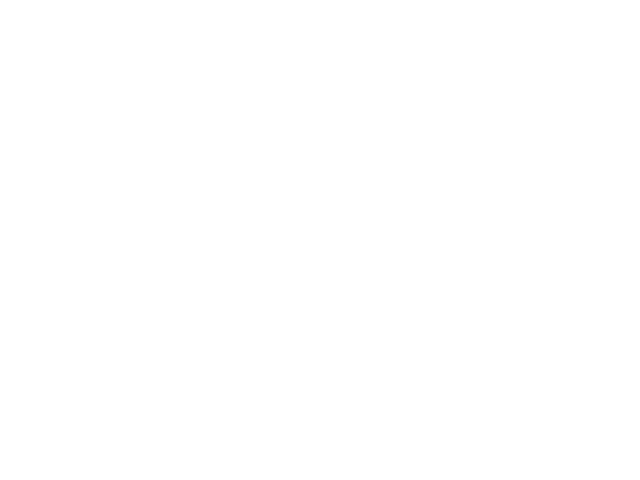

damagecausecode
01    Axes(0.125,0.1;0.775x0.8)
1     Axes(0.125,0.1;0.775x0.8)
11    Axes(0.125,0.1;0.775x0.8)
12    Axes(0.125,0.1;0.775x0.8)
13    Axes(0.125,0.1;0.775x0.8)
14    Axes(0.125,0.1;0.775x0.8)
21    Axes(0.125,0.1;0.775x0.8)
31    Axes(0.125,0.1;0.775x0.8)
41    Axes(0.125,0.1;0.775x0.8)
42    Axes(0.125,0.1;0.775x0.8)
43    Axes(0.125,0.1;0.775x0.8)
44    Axes(0.125,0.1;0.775x0.8)
51    Axes(0.125,0.1;0.775x0.8)
61    Axes(0.125,0.1;0.775x0.8)
62    Axes(0.125,0.1;0.775x0.8)
63    Axes(0.125,0.1;0.775x0.8)
71    Axes(0.125,0.1;0.775x0.8)
81    Axes(0.125,0.1;0.775x0.8)
87    Axes(0.125,0.1;0.775x0.8)
91    Axes(0.125,0.1;0.775x0.8)
93    Axes(0.125,0.1;0.775x0.8)
99    Axes(0.125,0.1;0.775x0.8)
XX    Axes(0.125,0.1;0.775x0.8)
dtype: object

In [233]:
# compare with scatter plot
actual.groupby(['damagecausecode']).plot(kind='scatter', x='pdsi', y='loss')

<IPython.core.display.Javascript object>


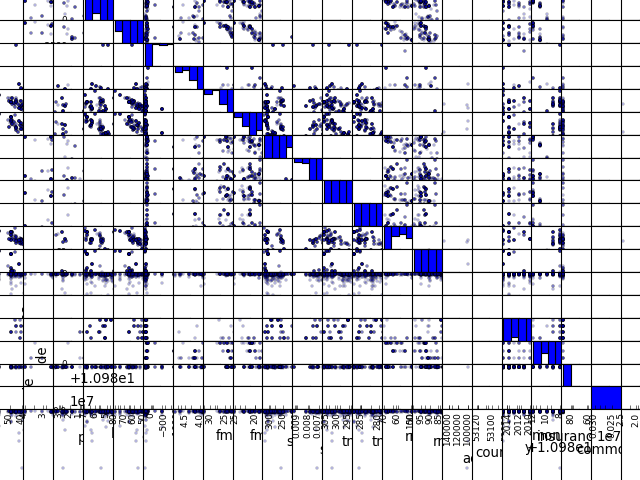

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = standardized
axes = pd.tools.plotting.scatter_matrix(df, alpha=0.2)
plt.tight_layout()
plt.savefig('scatter_matrix.png')

## Setup Training and Testing
### Xm_standard - X vector, normalized
### y_zscore - y vector, normalized

In [468]:
Xm_standard = Xm_standard.drop('acres_zscore', 1)
Xpre_standard = Xpre_standard.drop('acres_zscore', 1)

In [526]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpre_standard, y_zscore)

## Actual observations, Washington, 2001 - 2015, with no z score standardization

In [470]:
actual.head()

bi        pr      pdsi       pet        erc        th        vs  \
0  13.452469  1.849202 -1.577330  2.714704  21.116135  207.2535  3.700304   
1  45.339425  0.087378 -2.592169  5.557981  59.932610  213.8275  3.085875   
2  45.339425  0.087378 -2.592169  5.557981  59.932610  213.8275  3.085875   
3  45.339425  0.087378 -2.592169  5.557981  59.932610  213.8275  3.085875   
4   4.206029  2.083701 -1.632989  0.388412   2.343059  173.9133  3.557707   

      fm1000      fm100       srad  ...        rmax   acres  countyfips  year  \
0  19.576891  16.295467  194.84370  ...    90.52961  145.80       53075  2001   
1  10.725571   9.578557  259.49582  ...    74.53552  158.70       53075  2001   
2  10.725571   9.578557  259.49582  ...    74.53552  650.78       53075  2001   
3  10.725571   9.578557  259.49582  ...    74.53552  377.64       53075  2001   
4  27.089711  23.732642   49.09466  ...    98.43846  305.00       53075  2001   

   monthcode  damagecausecode  insuranceplancode  commoditycode  stagecode  \
0          4               11                 44             11          H   
1          8               12                 42             11          H   
2          8               11                 90             11          H   
3          8               12                 90             11          H   
4         12               43                 44             11          H   

    loss  
0  11397  
1   4202  
2  15222  
3  13255  
4  29067  

[5 rows x 24 columns]

## Observations, Washingtion, 2001 - 2015, with all climate data converted to z-scores

In [471]:
Xm_standard.columns

Index([u'bi_zscore', u'pr_zscore', u'pdsi_zscore', u'pet_zscore',
       u'erc_zscore', u'th_zscore', u'vs_zscore', u'fm1000_zscore',
       u'fm100_zscore', u'srad_zscore', u'sph_zscore', u'tmmx_zscore',
       u'tmmn_zscore', u'rmin_zscore', u'rmax_zscore', u'jan', u'feb', u'mar',
       u'apr', u'may', u'jun', u'jul', u'aug', u'sep', u'oct', u'nov', u'dec',
       u'decline in price', u'decline in price', u'drought', u'heat',
       u'failure irrig supply', u'failure irrig equip', u'hail',
       u'excess moisture/precip/rain', u'frost', u'freeze', u'cold winter',
       u'cold wet weather', u'flood', u'wind/excess wind', u'hot wind',
       u'cyclone', u'insects', u'plant disease', u'falling numbers', u'fire',
       u'wildlife', u'other(snow-lightning-etc)', u'other causes', u'YP',
       u'RP', u'RPHPE', u'IP', u'CRC', u'APH', u'H', u'P', u'P2', u'PT', u'R',
       u'UH'],
      dtype='object')

In [472]:
Xpre_standard.head()

bi_zscore  pr_zscore  pdsi_zscore  pet_zscore  erc_zscore  th_zscore  \
0  -0.916297   0.922433    -0.320978   -0.653673   -0.868043   0.309551   
1   1.310641  -1.304023    -0.839299    0.808787    1.163651   0.322545   
2   1.310641  -1.304023    -0.839299    0.808787    1.163651   0.322545   
3   1.310641  -1.304023    -0.839299    0.808787    1.163651   0.322545   
4  -1.562055   1.218775    -0.349405   -1.850219   -1.850645   0.243654   

   vs_zscore  fm1000_zscore  fm100_zscore  srad_zscore  sph_zscore  \
0   0.526307       0.732614      0.632522    -0.312873   -0.710749   
1  -0.953833      -1.013020     -0.909538     0.400776    0.919795   
2  -0.953833      -1.013020     -0.909538     0.400776    0.919795   
3  -0.953833      -1.013020     -0.909538     0.400776    0.919795   
4   0.182795       2.214272      2.339940    -1.921695   -1.487408   

   tmmx_zscore  tmmn_zscore  rmin_zscore  rmax_zscore  
0    -0.739076    -0.709403     0.464921     0.938287  
1     1.190005     1.130349    -1.130639    -0.727895  
2     1.190005     1.130349    -1.130639    -0.727895  
3     1.190005     1.130349    -1.130639    -0.727895  
4    -1.904095    -1.759365     2.322970     1.762190

In [473]:
y_zscore

loss_zscore
0      -0.149834
1      -0.155392
2      -0.146879
3      -0.148398
4      -0.136183
5      -0.144828
6      -0.154788
7      -0.146954
8      -0.139357
9      -0.155635
10     -0.156692
11     -0.016990
12     -0.158540
13     -0.159136
14     -0.158338
15     -0.158086
16      0.005191
17     -0.156791
18     -0.158527
19     -0.158228
20     -0.156476
21     -0.146950
22      0.081999
23     -0.155720
24     -0.147826
25     -0.158615
26     -0.095519
27     -0.155225
28     -0.151228
29     -0.158082
30     -0.156701
31     -0.156149
32     -0.157915
33     -0.154758
34     -0.145845
35     -0.156587
36     -0.141245
37     -0.142316
38     -0.150524
39     -0.158040
40     -0.154603
41     -0.110828
42     -0.141918
43     -0.158204
44     -0.126476
45     -0.158084
46     -0.157582
47     -0.132621
48     -0.055356
49     -0.141037
50     -0.068549
51      0.068021
52     -0.145320
53     -0.146938
54     -0.135948
55     -0.141880
56     -0.156076
57     -0.110431
58     -0.157306
59     -0.144927
60     -0.155524
61     -0.156123
62     -0.117147
63     -0.157566
64     -0.142643
65     -0.145606
66     -0.157920
67     -0.158637
68     -0.151727
69      0.127718
70     -0.083893
71     -0.155378
72     -0.077967
73     -0.154231
74      0.015506
75     -0.155134
76     -0.152367
77     -0.113491
78     -0.158163
79     -0.139969
80     -0.097315
81     -0.148173
82     -0.154538
83     -0.158272
84     -0.155461
85     -0.148951
86     -0.157935
87     -0.157962
88     -0.143136
89     -0.137595
90     -0.088644
91     -0.103354
92     -0.156655
93     -0.157989
94     -0.157449
95     -0.156095
96     -0.158414
97     -0.158423
98     -0.140519
99     -0.158371
100    -0.157843
101    -0.153102
102    -0.156574
103    -0.157601
104    -0.158129
105    -0.156524
106    -0.158186
107    -0.155425
108    -0.151251
109    -0.151525
110    -0.156383
111    -0.155335
112    -0.155170
113    -0.157523
114    -0.157892
115    -0.153920
116    -0.158045
117    -0.158276
118    -0.150996
119    -0.147684
120    -0.157889
121    -0.139404
122    -0.150545
123    -0.154270
124    -0.157488
125    -0.157357
126    -0.141687
127    -0.116809
128    -0.158419
129    -0.139527
130    -0.155748
131     0.132679
132    -0.156192
133     0.267392
134    -0.099640
135    -0.154389
136    -0.150704
137    -0.145751
138    -0.157078
139    -0.065803
140    -0.158381
141     0.097040
142    -0.157501
143    -0.148806
144    -0.158405
145    -0.143637
146    -0.153835
147    -0.153609
148    -0.146327
149    -0.158580
150    -0.155639
151    -0.158136
152    -0.158023
153    -0.157944
154    -0.141857
155    -0.146196
156    -0.001290
157    -0.149453
158    -0.130481
159    -0.115755
160    -0.155157
161    -0.154125
162     0.198283
163    -0.099343
164    -0.138351
165    -0.156996
166    -0.142262
167    -0.157271
168    -0.143726
169    -0.149307
170    -0.150769
171    -0.151457
172    -0.155075
173    -0.156455
174    -0.153466
175    -0.157424
176    -0.155419
177    -0.154146
178    -0.001866
179    -0.036724
180    -0.126712
181    -0.156404
182    -0.156920
183     0.086959
184     0.024325
185    -0.098544
186    -0.103673
187    -0.154237
188    -0.146735
189    -0.155158
190    -0.070417
191    -0.136009
192    -0.156748
193    -0.126314
194    -0.152977
195    -0.142124
196    -0.154077
197    -0.152637
198    -0.120851
199    -0.148532
200    -0.156941
201    -0.040007
202     0.137341
203     0.249911
204    -0.155676
205    -0.156501
206    -0.132698
207    -0.131611
208    -0.155870
209    -0.153805
210    -0.123745
211    -0.145243
212     0.380892
213    -0.155507
214    -0.063676
215     0.821176
216    -0.157229
217    -0.157917
218    -0.126908
219    -0.037154
220    -0.052152
221    -0.134791
222     0.964502
223    -0.155148
224    -0.141363
225    -0.154702
226    -0.156404
227    -0.158073
228    -0.153433
229    -0.155412
230    -0.122111
231     0.037263
232     0.042832
233    -0.155677
234     0.

# Machine Learning Analysis

### Remove acreage as a feature variable.  

In [379]:
X = Xm_standard
y = y_zscore

## Building a regression decision tree in scikit-learn

In [527]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

In [528]:
# use 10 fold CV to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, Xpre_standard, y_zscore, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

1.0483276154133463

## Tuning regression tree

Let's try to reduce the RMSE by tuning the **max_depth** parameter:

In [529]:
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, Xpre_standard, y_zscore, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

1.0400974680935979

## Looping thru a set number of max_depths to see the optimum level

In [530]:
# list of values to try
max_depth_range = range(1, 50)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, Xpre_standard, y_zscore, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

<IPython.core.display.Javascript object>


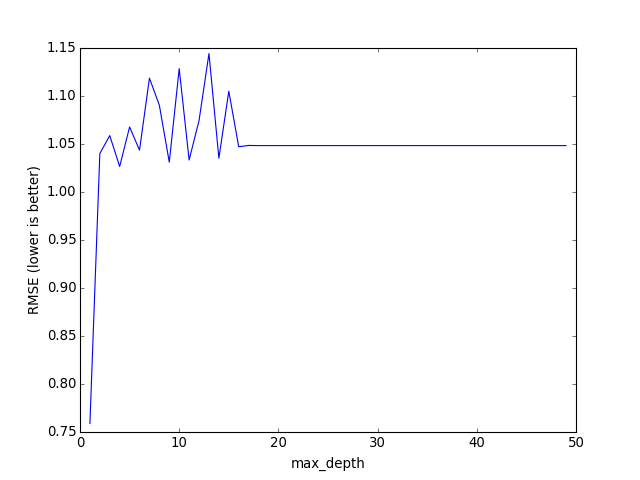

In [531]:
%matplotlib nbagg
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

#### NRMSE = RMSE/(max(DV)-min(DV)) 

In [532]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=15, random_state=1)
treereg.fit(Xpre_standard, y_zscore)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

## Decision Tree Feature Importance determination

In [533]:
cols = Xpre_standard.columns

In [534]:
cols

Index([u'bi_zscore', u'pr_zscore', u'pdsi_zscore', u'pet_zscore',
       u'erc_zscore', u'th_zscore', u'vs_zscore', u'fm1000_zscore',
       u'fm100_zscore', u'srad_zscore', u'sph_zscore', u'tmmx_zscore',
       u'tmmn_zscore', u'rmin_zscore', u'rmax_zscore'],
      dtype='object')

In [535]:
pd.set_option('display.max_rows', 640)
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
importance = pd.DataFrame({'feature':cols, 'importance':treereg.feature_importances_})


In [536]:
importance

feature  importance
0       bi_zscore    0.000079
1       pr_zscore    0.008342
2     pdsi_zscore    0.000039
3      pet_zscore    0.126756
4      erc_zscore    0.000180
5       th_zscore    0.068767
6       vs_zscore    0.002039
7   fm1000_zscore    0.009774
8    fm100_zscore    0.000029
9     srad_zscore    0.071963
10     sph_zscore    0.001885
11    tmmx_zscore    0.009716
12    tmmn_zscore    0.016334
13    rmin_zscore    0.001069
14    rmax_zscore    0.683028

In examining the above feature importance table, these variables appear to be the most significant with regards to crop loss:

- pdsi - Palmer Drought Suitability Index
- srad - Solar radiation
- decline in price - a dummy variable of damage cause.  Decline in Price is a type of damage that a farmer would declare as the reason for his insurance claim.  

    
    

In [391]:
sig_feature_cols = ['pdsi_zscore', 'decline in price', 'srad']
X_sig = train[feature_cols]


## Creating a tree diagram

In [537]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='/home/git/dmine/circ/tree_ag.dot', feature_names=cols)
#export_graphviz(treereg, out_file='tree_ag.dot')

#print fileconvert
# At the command line, run this to convert to PNG:
#dot -Tpng tree_ag.dot -o tree_ag.png

In [508]:
%system("dot -Tpng /home/git/dmine/circ/tree_ag.dot -o /home/git/dmine/circ/tree_ag_wheat.png")

['/bin/sh: dot -Tpng /home/git/dmine/circ/tree_ag.dot -o /home/git/dmine/circ/tree_ag_wheat.png: No such file or directory']

In [387]:

graph.draw('tree_ag_wheat.png')

NameError: name 'graph' is not defined

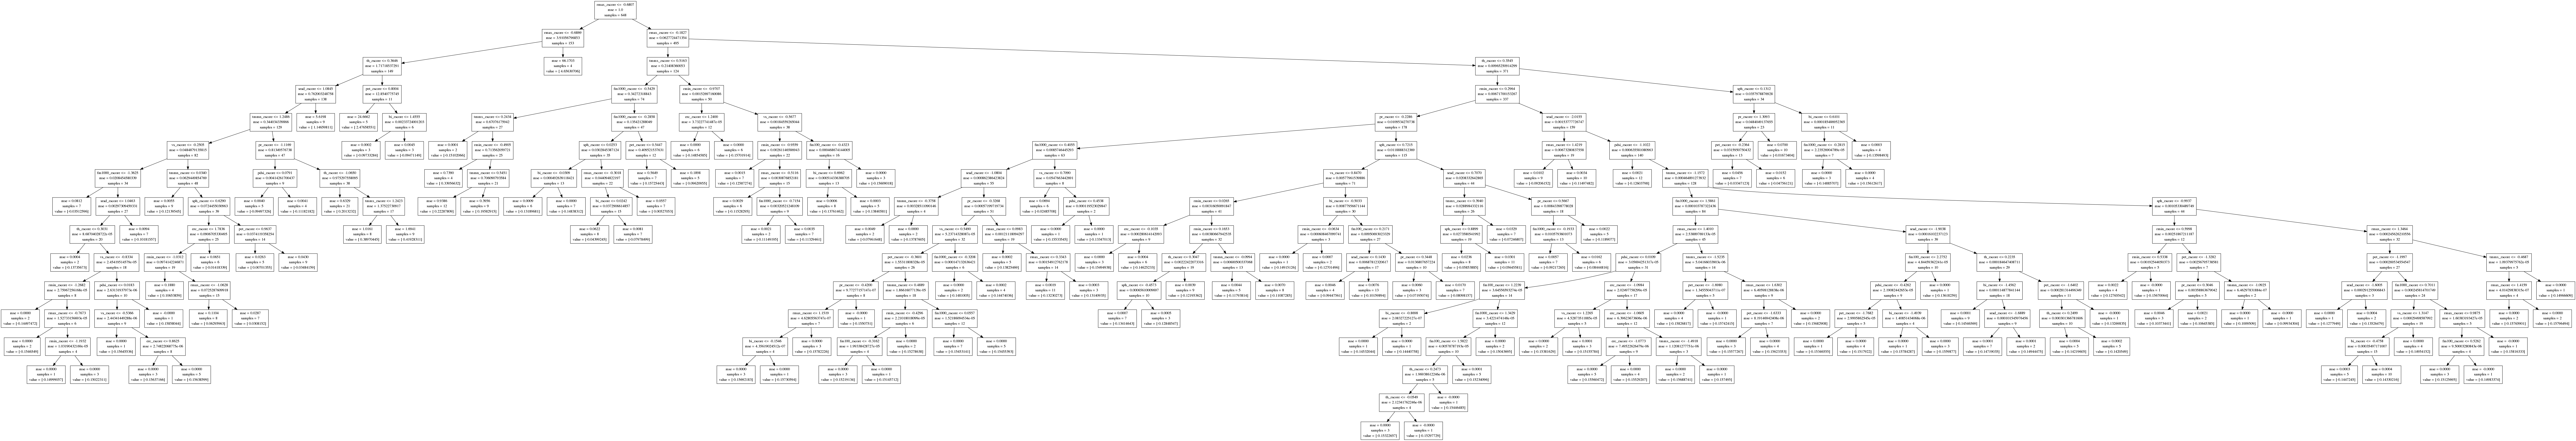

In [523]:
from IPython.display import Image
Image(filename='/home/git/dmine/circ/tree_ag_wheat.png')

## Making predictions for the testing data

**Question:** Using the tree diagram above, what predictions will the model make for each observation?

In [538]:
y_pred = treereg.predict(X_test)
y_pred

array([-0.13414643,  4.65630706, -0.09206152, -0.03512596, -0.11497482,
       -0.15688741, -0.11182182, -0.15297729, -0.03484159,  1.14659811,
       -0.1277949 , -0.14546569, -0.15381629, -0.11528295, -0.14838312,
       -0.07246807, -0.01673404, -0.09934304,  0.33956632, -0.04756121,
        0.09620955, -0.14546569, -0.11087285, -0.15455393,  0.38970445,
       -0.14625233, -0.09497326, -0.12587274, -0.12848547, -0.1447245 ,
       -0.07246807, -0.13761462, -0.13735673,  0.2013232 , -0.09206152,
       -0.13230273, -0.1517922 , -0.12603798, -0.12587274, -0.14219605,
        0.33956632,  1.14659811,  0.22287809,  0.19582915, -0.05645581,
       -0.15322657, -0.03347123, -0.13269835, -0.15701914,  0.38970445,
       -0.15219134, -0.14983374,  0.22287809,  0.22287809, -0.07246807,
       -0.12139545, -0.15155784,  0.41928311, -0.05645581, -0.07246807,
        0.19582915,  0.41928311, -0.13230273,  0.41928311, -0.14838312,
       -0.02485708, -0.15529207,  0.2013232 , -0.15453141, -0.12

In [539]:
from sklearn import metrics
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.2253138600809148

In [540]:
# calculate RMSE for your own tree!
#y_test = []
#y_pred = []
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.2253138600809148

## Random Forest

In [541]:
rf_range = range(1, 50)
rf_scores = []
for k in rf_range:
    rfreg = RandomForestRegressor(n_estimators=k, random_state=42)
    rfa_fit = rfreg.fit(Xpre_standard,y_zscore)
    rfa_scores = rfa_fit.score(X_test, y_test)
    rf_scores.append(rfa_scores.mean())

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1

<IPython.core.display.Javascript object>


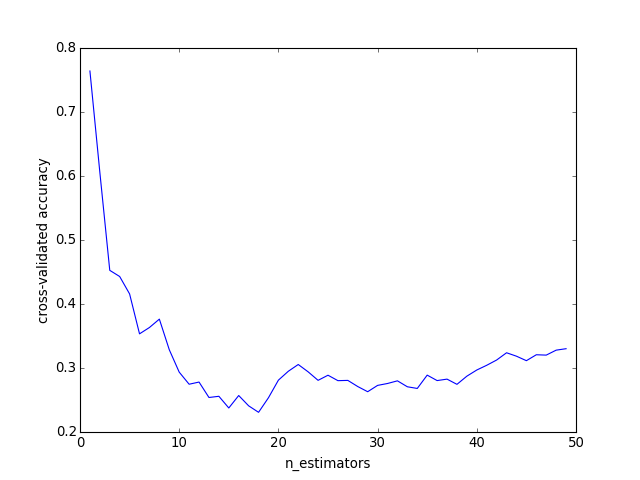

In [542]:
import matplotlib
%matplotlib nbagg
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(rf_range, rf_scores)
plt.xlabel('n_estimators')
plt.ylabel('cross-validated accuracy')

## Optimized Random Forest

In [565]:
from sklearn.ensemble import RandomForestRegressor
rfor = RandomForestRegressor(max_depth = 15)
rforfit = rfor.fit(Xpre_standard,y_zscore)
result14 = rforfit.score(X_test,y_test)
print "The AUC for the variables selected with logistic regression is:"
print round(result14, 4)
print "The time it takes to run is:"


The AUC for the variables selected with logistic regression is:
0.6329
The time it takes to run is:


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


In [566]:
rfor_range = range(1, 50)
rfor_scores = []

for k in rfor_range:
    rfreg = RandomForestRegressor(n_estimators=k, random_state=42)
    rfa_fit = rfreg.fit(Xpre_standard,y_zscore)
    rfa_scores = rfa_fit.score(X_test, y_test)
    rfor_scores.append(rfa_scores.mean())

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1

<IPython.core.display.Javascript object>


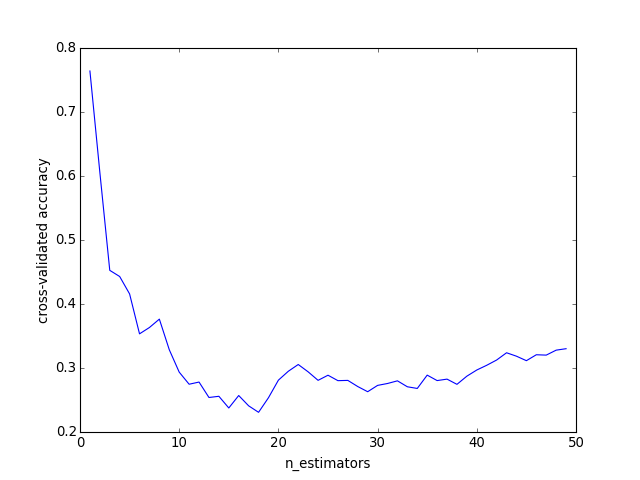

In [567]:
import matplotlib
%matplotlib nbagg
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(rfor_range, rfor_scores)
plt.xlabel('n_estimators')
plt.ylabel('cross-validated accuracy')

### Ridge Regression

In [568]:
from sklearn.linear_model import RidgeCV
np.mean(cross_val_score(RidgeCV(), Xpre_standard, y_zscore, scoring='mean_squared_error'))

-1.0318821325974326

## Find Optimal K in KNN

In [569]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
x = range(1, 25)
knnoptim = []
for k in x:
    knno = KNeighborsRegressor(n_neighbors = k)
    kfit = knno.fit(Xpre_standard,y_zscore)
    scores = kfit.score(X_test, y_test)
    knnoptim.append(scores)

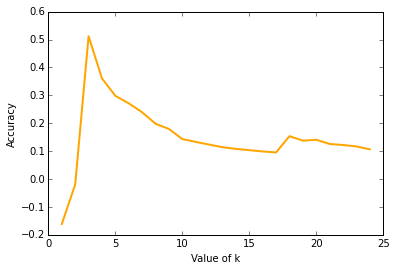

In [570]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, knnoptim, color = 'orange', linewidth = 2)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')

### K Nearest Neighbors rerun with N = 10, as determined from above accuracy testing

In [571]:
knn = KNeighborsRegressor(n_neighbors=3)
knnfit = knn.fit(Xpre_standard,y_zscore)
result =  knnfit.score(X_test, y_test)
print "The accuracy score selected with logistic regression is:"
print round(result, 4)
print "The time it took to run is:"

The accuracy score selected with logistic regression is:
0.5116
The time it took to run is:


### Find optimal max depth for Regression Decision tree

Here we iterate thru a set of ranges for maximum depth of a decision tree, to see what is the optimum depth

In [572]:
from sklearn.tree import DecisionTreeRegressor
deep = range(1, 100)
treeoptim = []
for i in deep:
    treee = DecisionTreeRegressor(random_state = 22, max_depth = i)
    treefit = treee.fit(Xpre_standard,y_zscore)
    treescore = treefit.score(X_test, y_test)
    treeoptim.append(treescore)

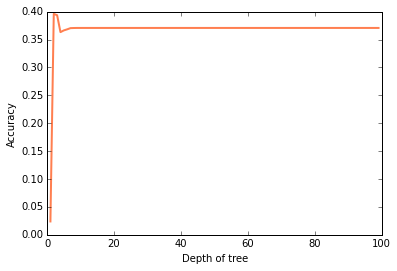

In [573]:
plt.plot(deep, treeoptim, color = 'coral', linewidth = 2)
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')

### Optimized Regression Decision Tree

Here we run a regression decision tree with a max depth of 20, as indicated from above accuracy testing

In [581]:
treee = DecisionTreeRegressor(random_state = 1, max_depth = 3)
treefit = treee.fit(Xpre_standard,y_zscore)
treescore = treefit.score(X_test, y_test)
print "The accuracy score for variables selected using a Regression Decision Tree is:"
treescore

The accuracy score for variables selected using a Regression Decision Tree is:


0.39356292038927565

## Ensemble methods - Bagging

In [582]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(max_samples = 640, random_state = 22)
bagfit = bag.fit(Xpre_standard, y_zscore)
result12 = bagfit.score(X_test, y_test)
print "The AUC for the variables selected with logistic regression is:"
print round(result12, 4)
print "The time it takes to run is:"

The AUC for the variables selected with logistic regression is:
0.2935
The time it takes to run is:


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Extremely Randomized Trees

In [583]:
from sklearn.ensemble import ExtraTreesRegressor
etree = ExtraTreesRegressor(random_state = 40, min_samples_split=1, bootstrap = True, max_depth = 3)
etreefit = etree.fit(Xpre_standard,y_zscore)
result16 = etreefit.score(X_test, y_test)
print "The AUC for the variables selected with logistic regression is:"
print round(result16, 4)
print "The time it takes to run is:"

The AUC for the variables selected with logistic regression is:
0.197
The time it takes to run is:


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
